Manjeet Singh ---- Data science case study for CEL Consulting.

I have divided this notebook into three parts.

1) Plots

2) Service Level by client, SKU, Order number and By Date

3) ABC classification of SKUs and Client

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

Lets bring the data in.

In [101]:
sales =pd.read_csv('C:/Users/msingh/Desktop/sales_test.csv')
cancel =pd.read_csv('C:/Users/msingh/Desktop/canceled_test.csv')

In [102]:
sales.isnull().sum(axis = 0)

Order No              0
Order Date            0
Line No               0
Ship To Address No    0
Item Code             0
Order Qty             0
Quantity Shipped      0
dtype: int64

In [103]:
cancel.isnull().sum(axis = 0)

Order Number          0
Line Number           0
Order Date            0
Ship To Address No    0
Item Code             0
Quantity Ordered      0
Quantity Canceled     0
dtype: int64

No missing values in both datasets. Pretty clean data.

In [104]:
#Number of Unique Addresses
len(sales['Ship To Address No'].unique())

708

In [105]:
#Number of Unique SKUs
len(sales['Item Code'].unique())

64

In [106]:
#Number of Unique Addresses
len(cancel['Ship To Address No'].unique())

605

There are differnce in addresses in both the sets(708 and 605) so we will have missing values when we will bring quantity cancelled column to sales dataset. We will see it later

# 1)  PLOTS

Data Visualisation

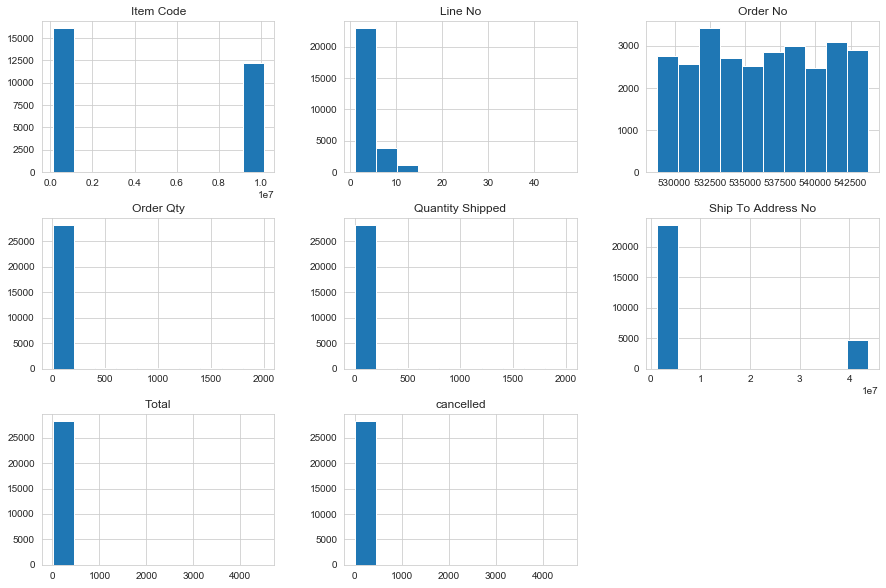

In [47]:
sales.hist()
plt.show()

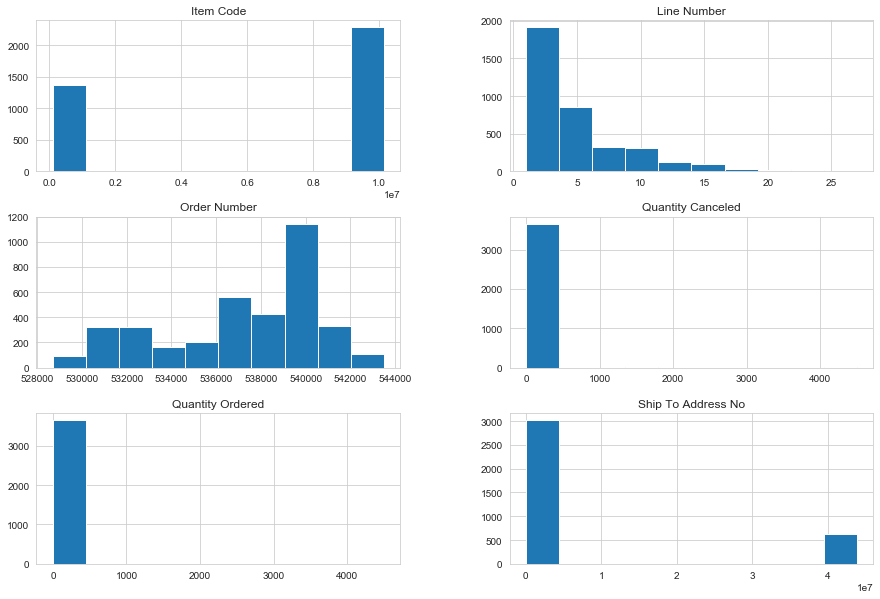

In [48]:
cancel.hist()
plt.show()

Ordered by Date

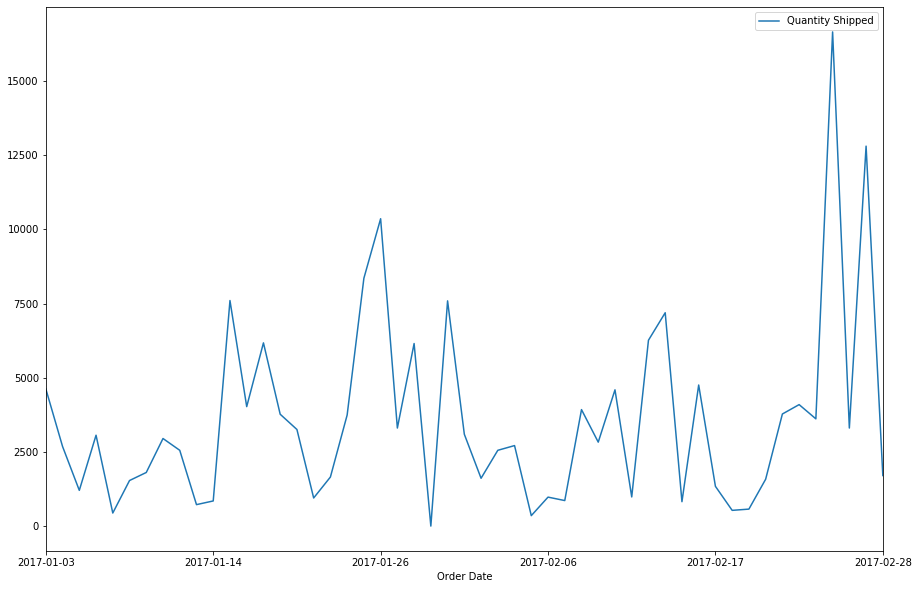

In [18]:
daily = sales.groupby('Order Date')['Quantity Shipped'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Cancelled by Date

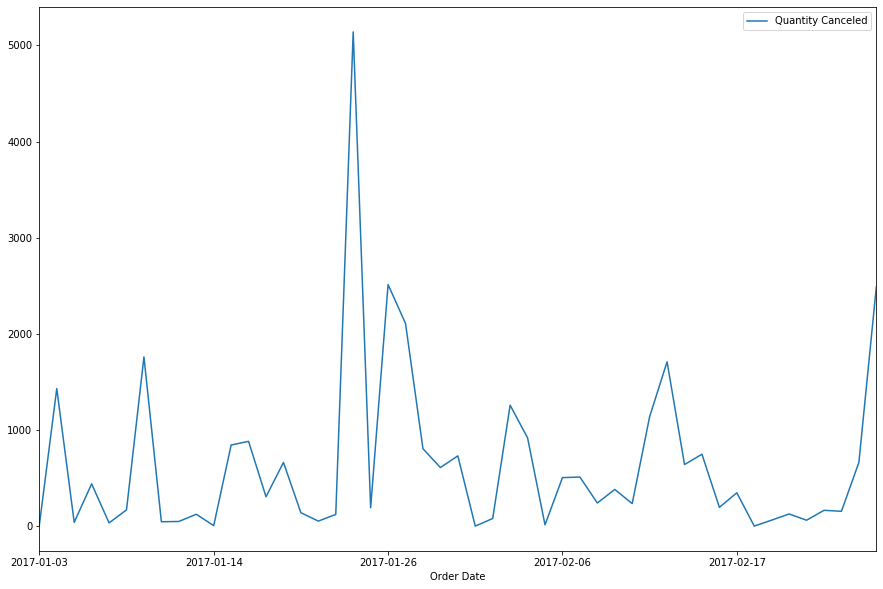

In [20]:
daily = cancel.groupby('Order Date')['Quantity Canceled'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Number of SKU Delivered by Date

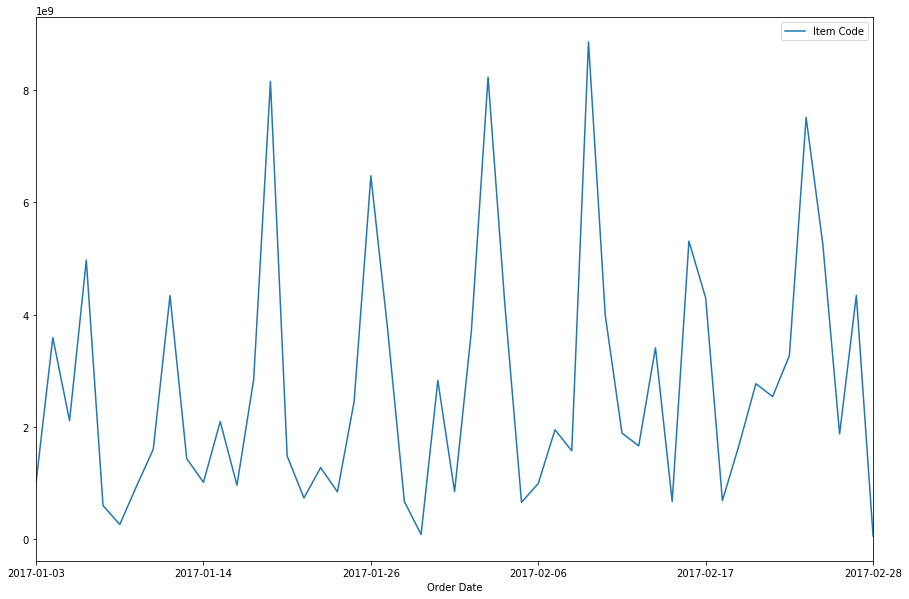

In [21]:
daily = sales.groupby('Order Date')['Item Code'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Number of SKU cancelled Per Date

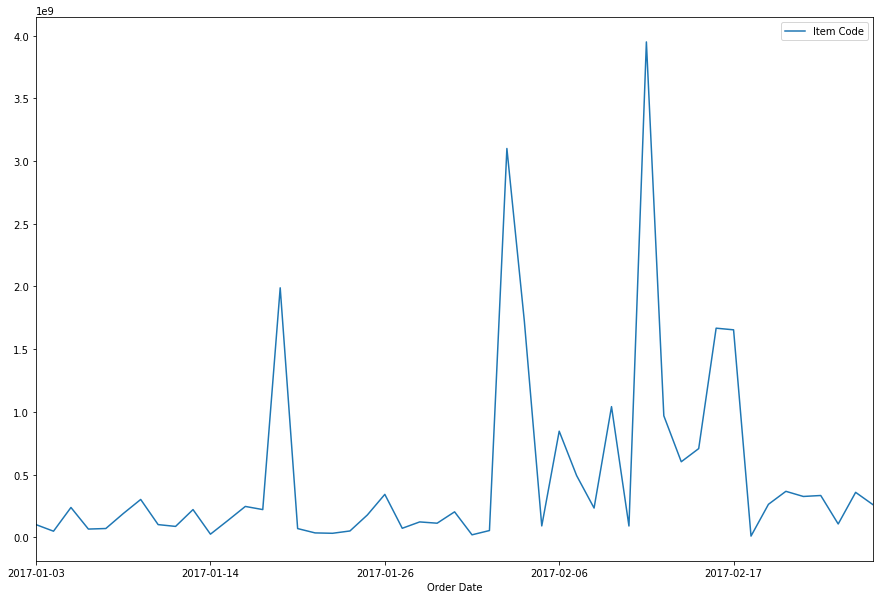

In [22]:
daily = cancel.groupby('Order Date')['Item Code'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Number of address being served per Date

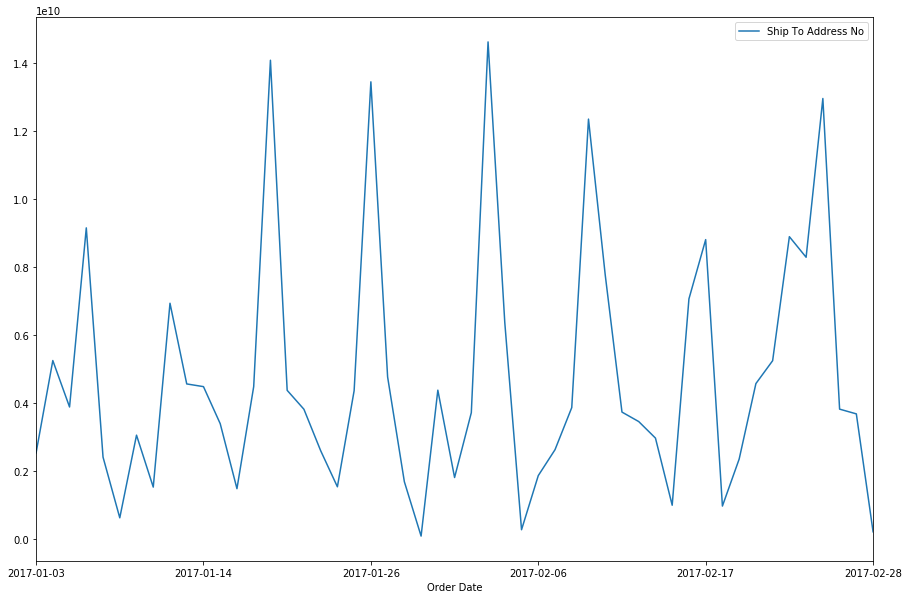

In [23]:
daily = sales.groupby('Order Date')['Ship To Address No'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Number of address cancelled per Date

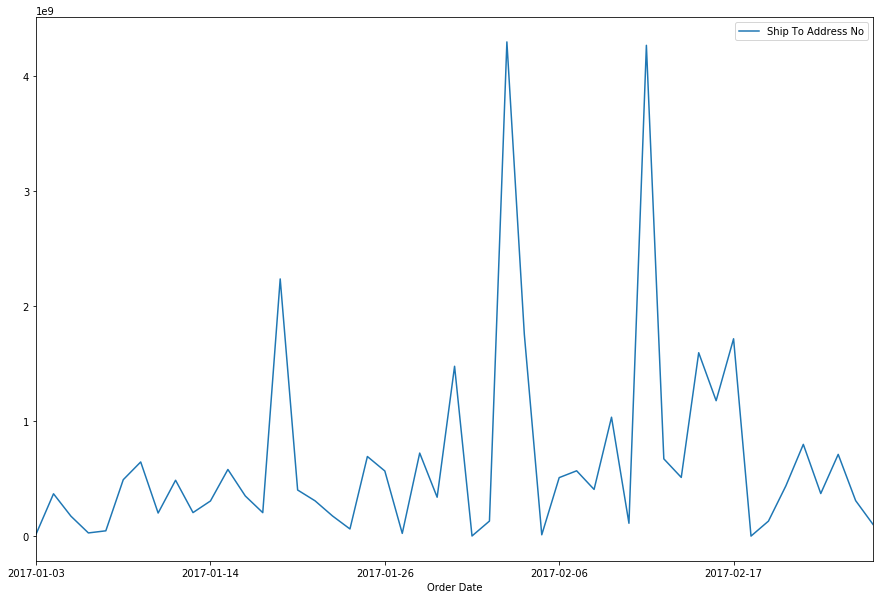

In [24]:
daily = cancel.groupby('Order Date')['Ship To Address No'].sum().reset_index()
daily.set_index('Order Date', inplace=True)
daily.plot()

Bar plot to visulaise date wise orders

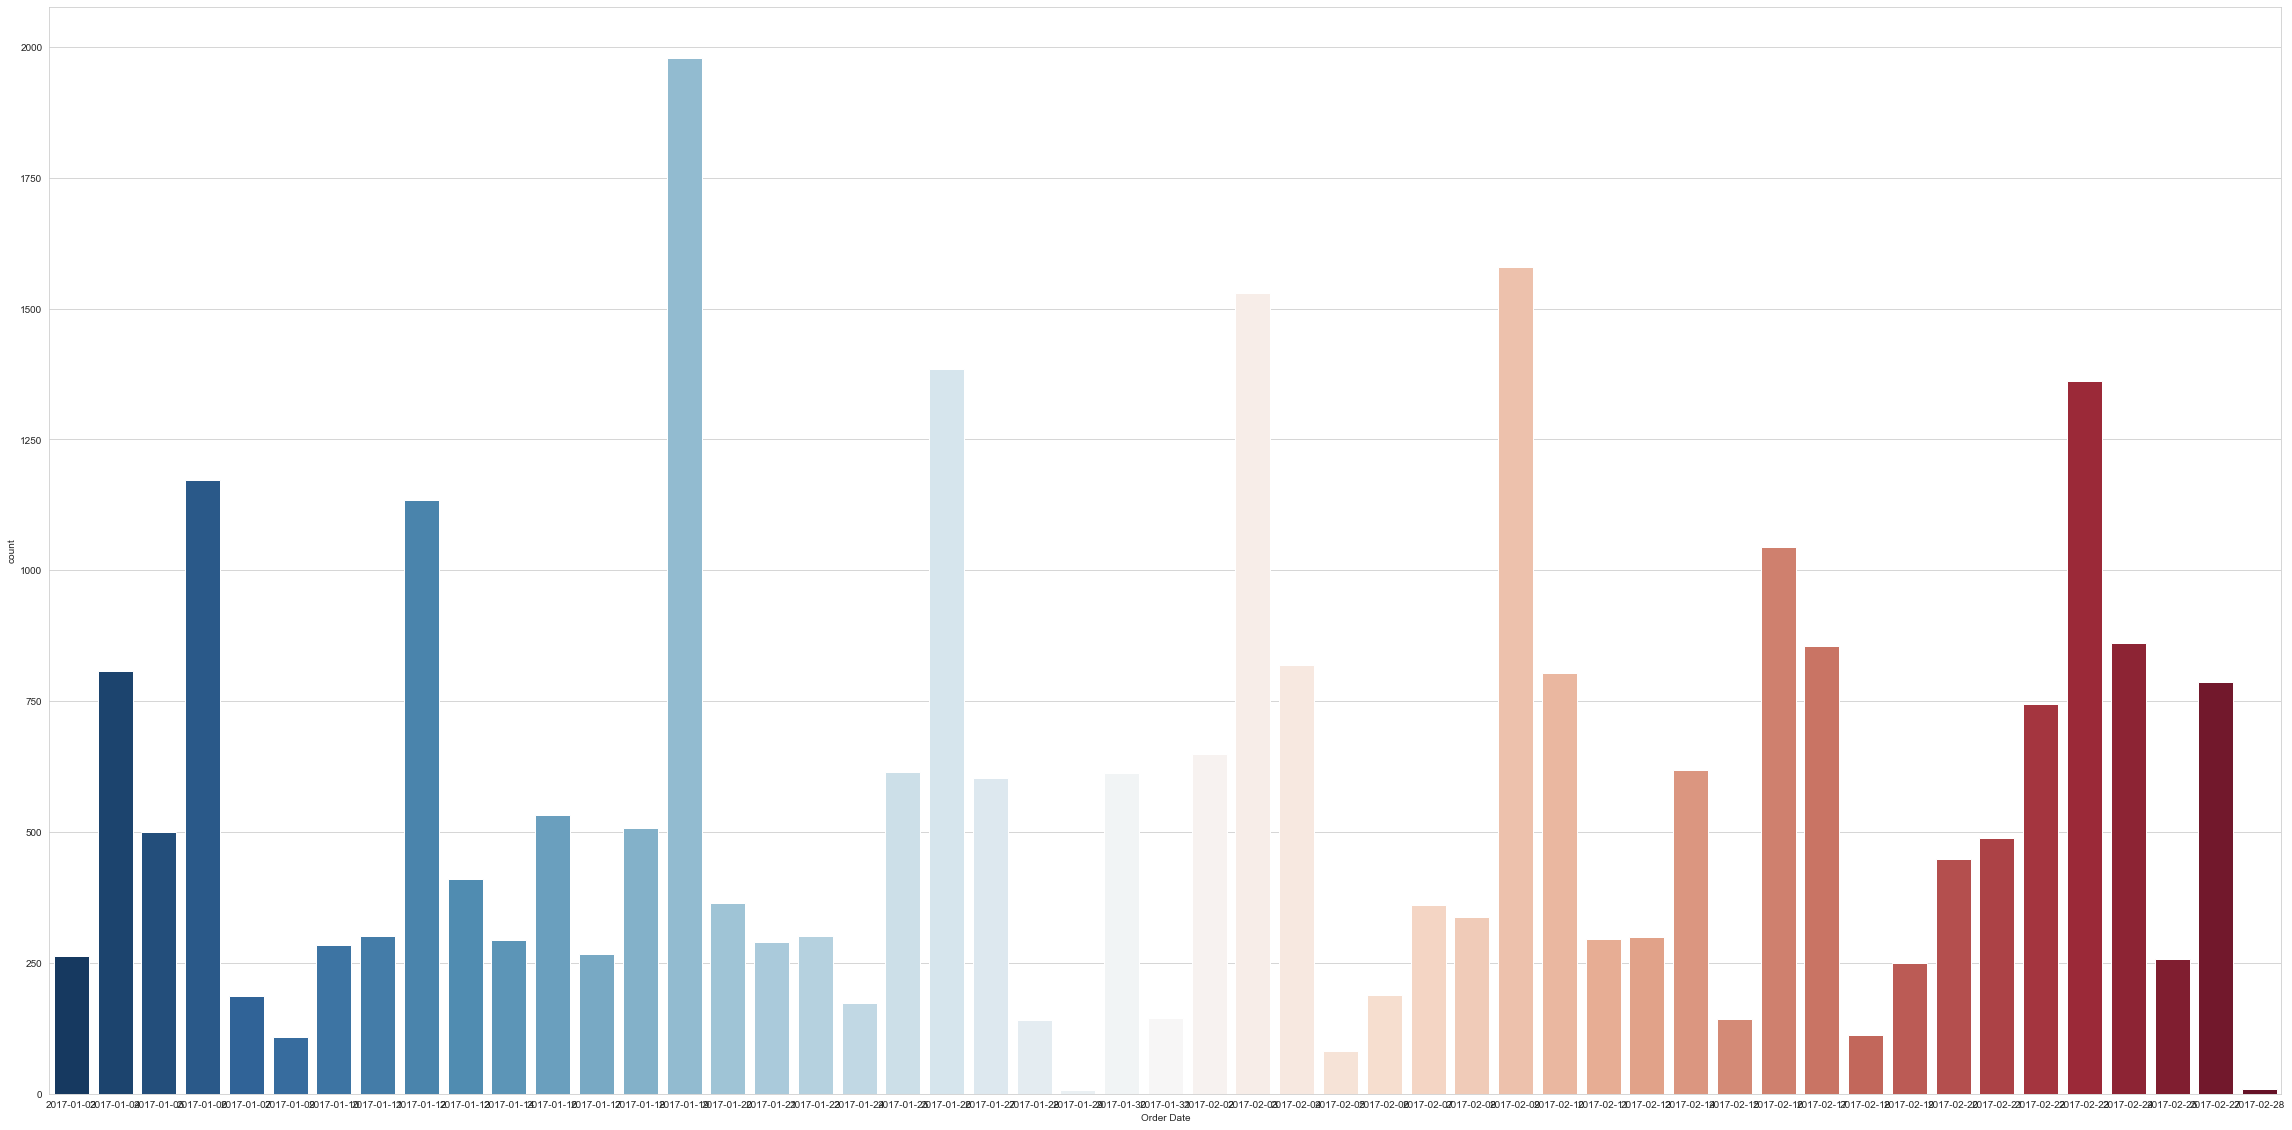

In [96]:
fig = plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
sns.countplot(x='Order Date',data=sales,palette='RdBu_r')

24th Feb was busiest day. A total 16656 items got shipped

Item Code vs address.  A specific Item got shipped to n number of addresses(clients)

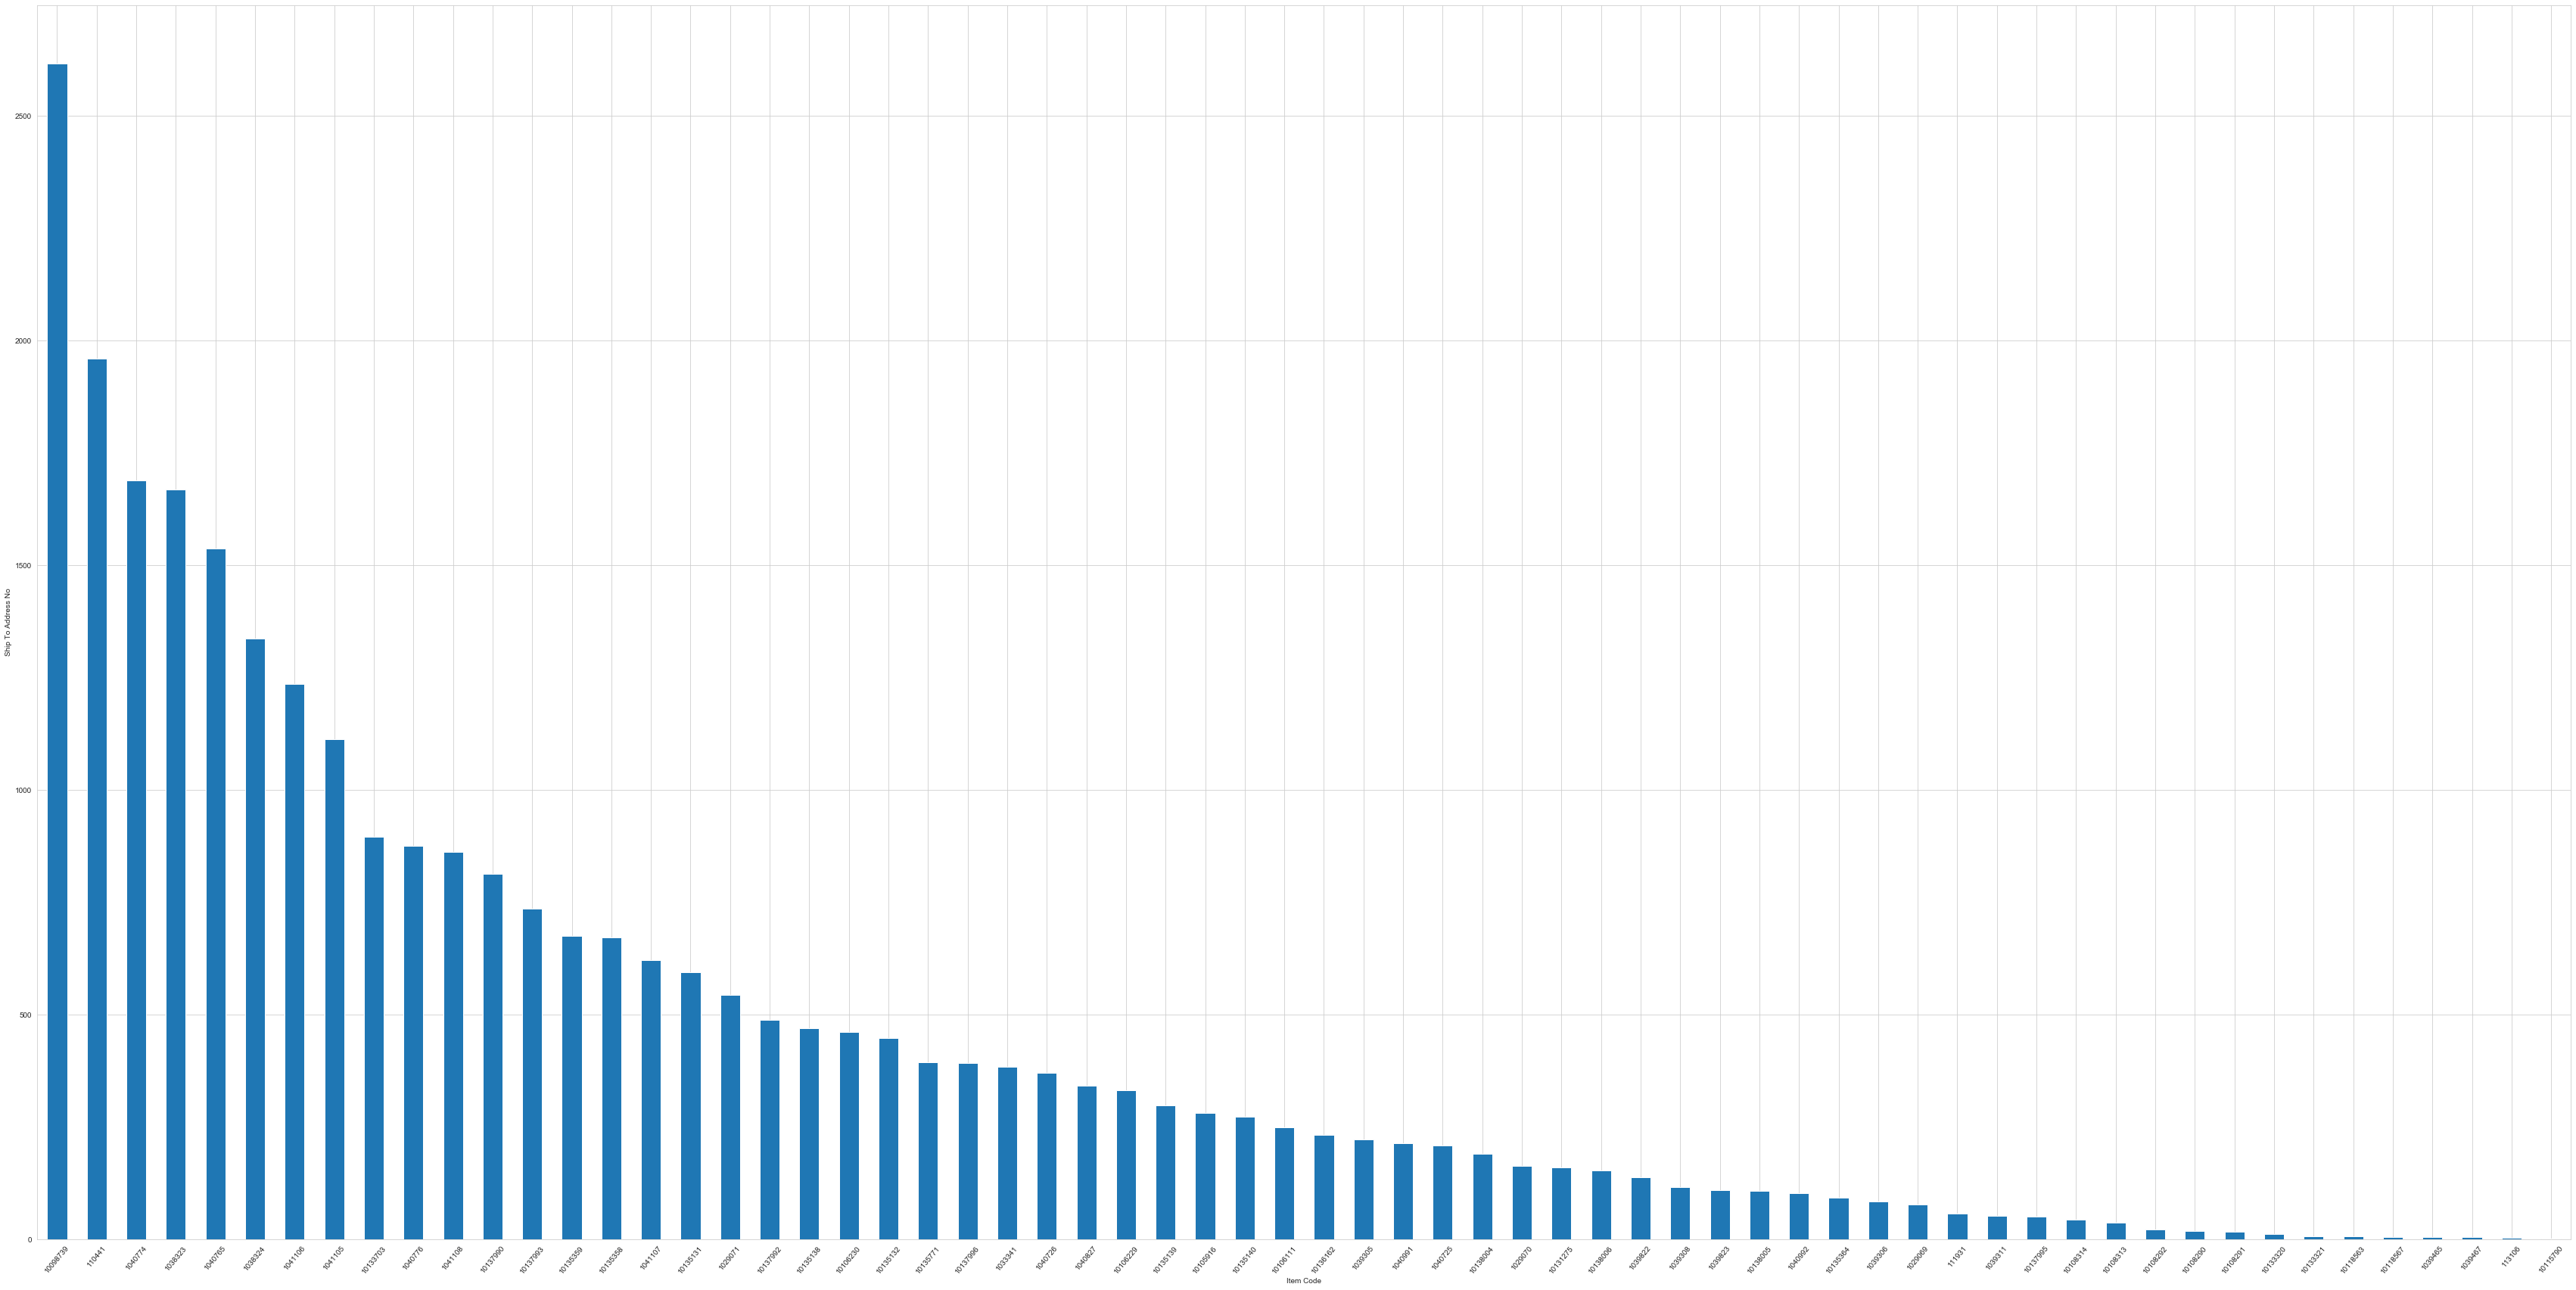

In [26]:
ItemCode = sales.groupby("Item Code")
plt.figure(figsize=(60,30))
ItemCode.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Item Code")
plt.ylabel("Ship To Address No")
plt.show()

Top 10 SKUs. This is a very important plot in figuring out top selling SKUs volume wise.

Text(0, 0.5, 'Ordered')

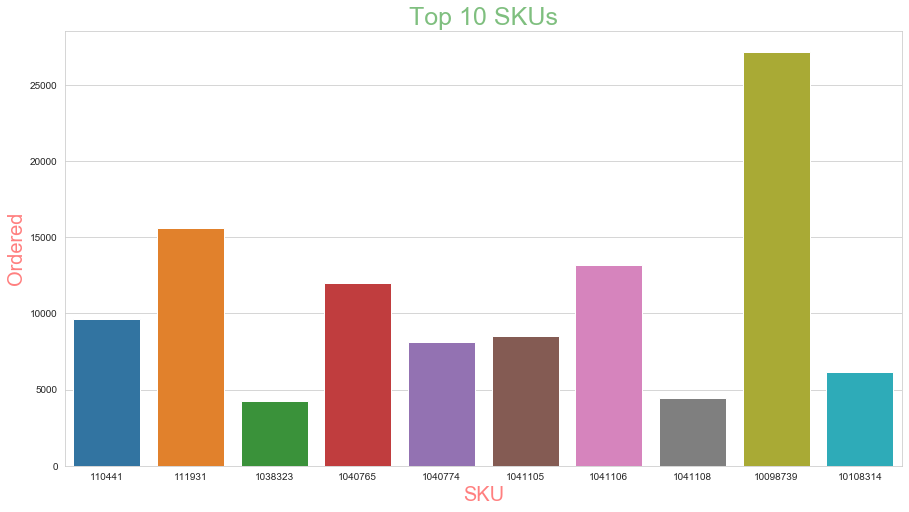

In [27]:
lit_by_states  = sales.groupby('Item Code').agg({'Order Qty': np.sum}).sort_values(
    [('Order Qty')], ascending=False)[:10]
plt.subplots(figsize=(15, 8))
ax = sns.barplot(data=lit_by_states, x=lit_by_states.index, y='Order Qty')
ax.set_title('Top 10 SKUs', size=25, alpha=0.5, color='green')
ax.set_xlabel('SKU', size=20, alpha=0.5, color='red')
ax.set_ylabel('Ordered', size=20, alpha=0.5, color='red')

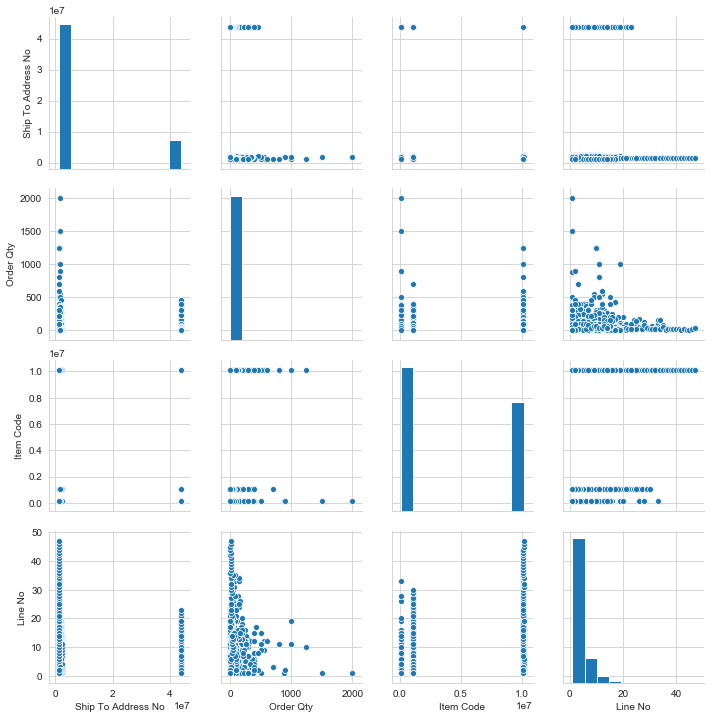

In [107]:
g = sns.pairplot(sales[['Ship To Address No','Order Qty','Item Code','Line No']])

Violin Plot to understand the distribution.

Sometimes the median and mean aren't enough to understand a dataset. 
Are most of the values clustered around the median? Or are they clustered around the minimum and the maximum 
with nothing in the middle? When you have questions like these, distribution plots are our friends.

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data

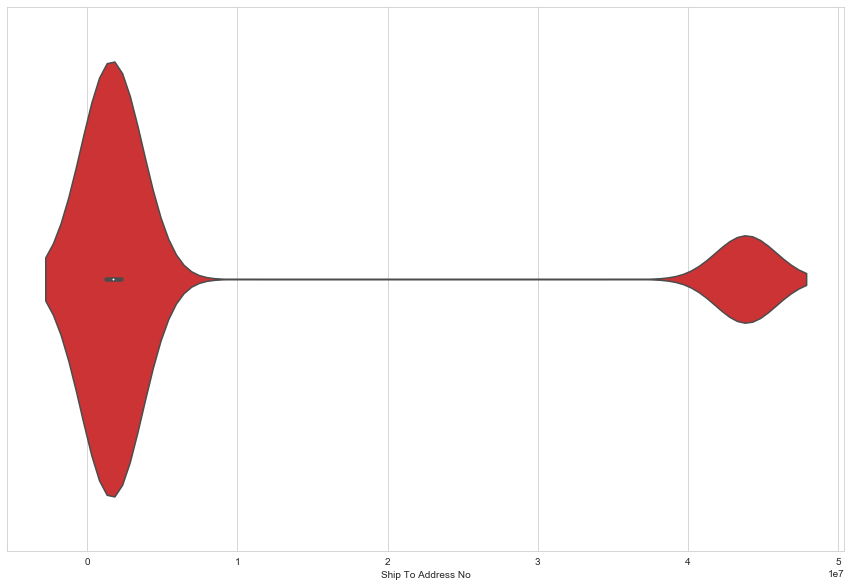

In [108]:
sns.violinplot(x="Ship To Address No", data=sales, palette="Set1") 

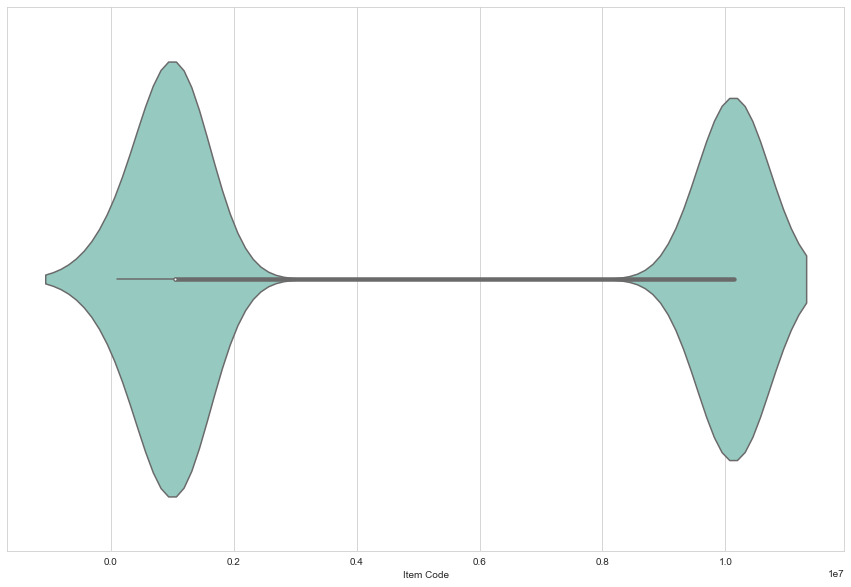

In [109]:
sns.violinplot(x="Item Code", data=sales, palette="Set3") 

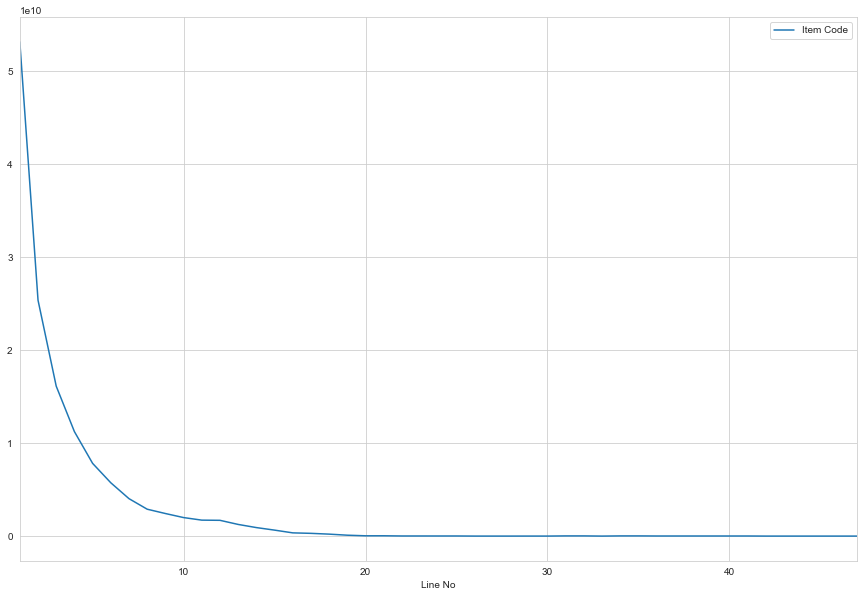

In [110]:
sales_items = sales[["Line No","Item Code"]]
sales_items.groupby("Line No").sum().plot(kind="line")

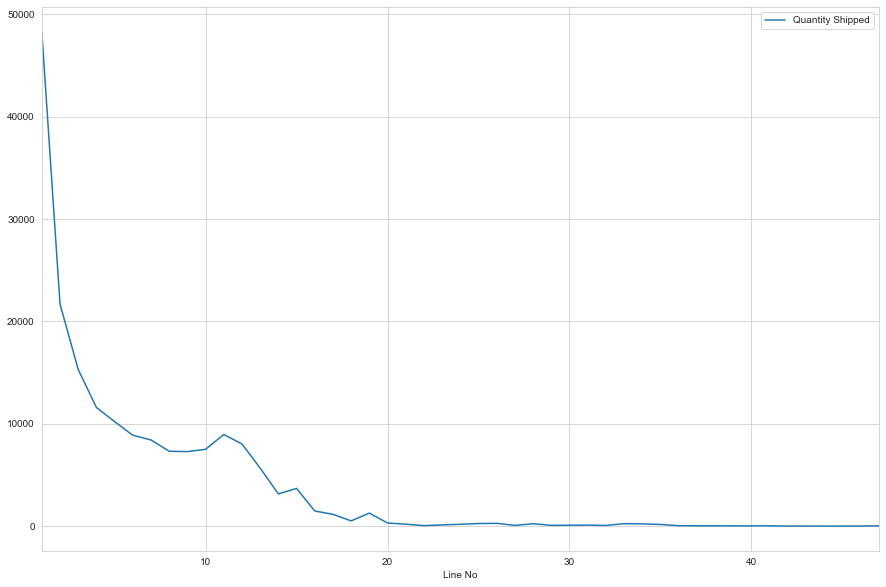

In [111]:
sales_items = sales[["Line No","Quantity Shipped"]]
sales_items.groupby("Line No").sum().plot(kind="line")

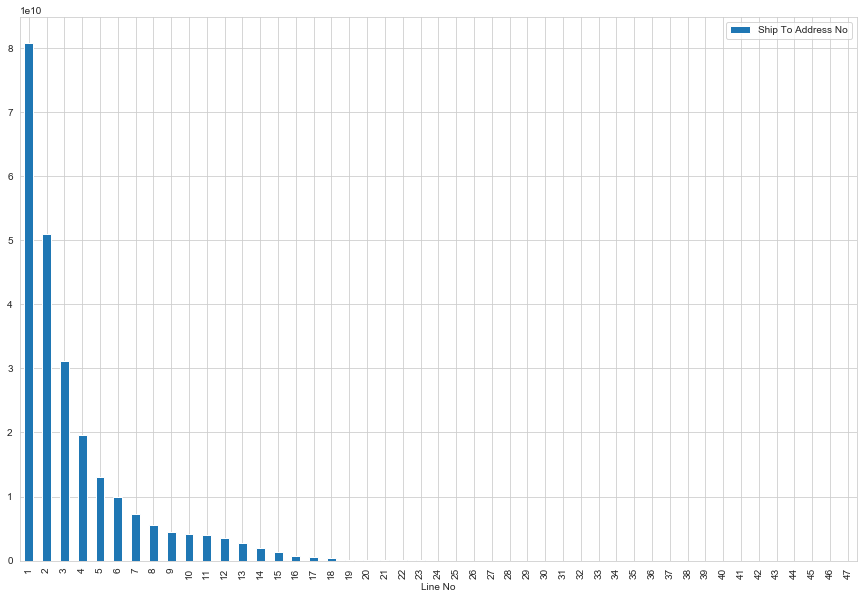

In [33]:
sales_items = sales[["Line No","Ship To Address No"]]
sales_items.groupby("Line No").sum().plot(kind="bar")

# 2 ) The service level

Service Level - The service level is the ratio delivered quantity over ordered quantity. 

So I added Delivered and cancelled which gave me total number of ordered quantity.

Then I divide the Total delivered with Total ordered.

# Services Per Client(Address)

In [112]:
sales['cancelled'] = cancel['Quantity Canceled']
sales = sales.fillna(0)

In [113]:
Groupby_Delivered = sales['Order Qty'].groupby(sales['Ship To Address No'], sort = True).sum()
sales['Total'] = sales['Quantity Shipped'] + sales['cancelled']
Groupby_Total = sales['Total'].groupby(sales['Ship To Address No'], sort = True).sum()
percentage = (Groupby_Delivered/Groupby_Total) *100
percentage

Ship To Address No
1254612.0      98.322851
1254686.0      95.208071
1254687.0      48.435374
1254688.0      52.647059
1254689.0      37.251356
                 ...    
43825209.0    100.000000
43825291.0    100.000000
43825305.0    100.000000
43825307.0    100.000000
43825356.0    100.000000
Length: 708, dtype: float64

# Services per SKU (Item Code)

In [115]:
Groupby_Delivered1 = sales['Order Qty'].groupby(sales['Item Code'], sort = True).sum()
Groupby_Total1 = sales['Total'].groupby(sales['Item Code'], sort = True).sum()
percentageSKU = (Groupby_Delivered1/Groupby_Total1) *100
percentageSKU

Item Code
110441       80.591001
111931       99.203822
113106      100.000000
1029069      69.117647
1029070      49.719416
               ...    
10137995    100.000000
10137996    100.000000
10138004    100.000000
10138005    100.000000
10138006    100.000000
Length: 64, dtype: float64

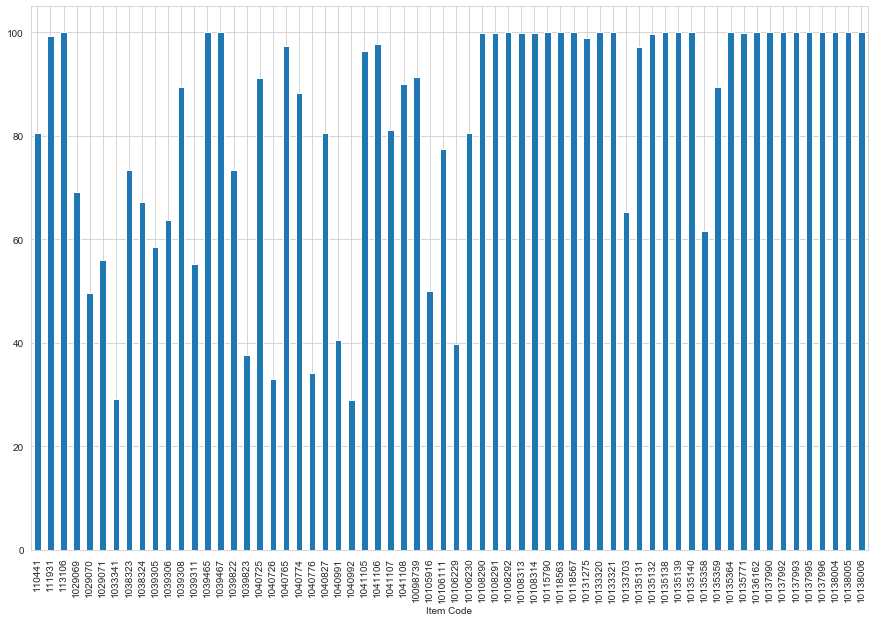

In [116]:
#Service by SKUs Plot
percentageSKU.plot(kind='bar')

# Services per Order

In [118]:
Groupby_Delivered2 = sales['Order Qty'].groupby(sales['Order No'], sort = True).sum()
Groupby_Total2 = sales['Total'].groupby(sales['Order No'], sort = True).sum()
percentageOrder = (Groupby_Delivered2/Groupby_Total2) *100
percentageOrder

Order No
528758     98.591549
528791     98.639456
528792     91.569767
528794      0.498931
528795     45.000000
             ...    
543761    100.000000
543762    100.000000
543764    100.000000
543765    100.000000
543766    100.000000
Length: 9411, dtype: float64

# Services Per Order Date

In [120]:
Groupby_Delivered3 = sales['Order Qty'].groupby(sales['Order Date'], sort = True).sum()
Groupby_Total3 = sales['Total'].groupby(sales['Order Date'], sort = True).sum()
percentageDate = (Groupby_Delivered3/Groupby_Total3) *100
percentageDate

Order Date
2017-01-03     62.626809
2017-01-04     14.123701
2017-01-05     36.768718
2017-01-06     48.036301
2017-01-07     16.116296
2017-01-09     66.637894
2017-01-10     80.203270
2017-01-11     64.200477
2017-01-12     54.039232
2017-01-13    100.000000
2017-01-14    100.000000
2017-01-16    100.000000
2017-01-17    100.000000
2017-01-18    100.000000
2017-01-19    100.000000
2017-01-20    100.000000
2017-01-21    100.000000
2017-01-23    100.000000
2017-01-24    100.000000
2017-01-25    100.000000
2017-01-26    100.000000
2017-01-27    100.000000
2017-01-28    100.000000
2017-01-29    100.000000
2017-01-30    100.000000
2017-01-31    100.000000
2017-02-02    100.000000
2017-02-03    100.000000
2017-02-04    100.000000
2017-02-05    100.000000
2017-02-06    100.000000
2017-02-07    100.000000
2017-02-08    100.000000
2017-02-09    100.000000
2017-02-10    100.000000
2017-02-11    100.000000
2017-02-13    100.000000
2017-02-14    100.000000
2017-02-15    100.000000
2017-02-16    

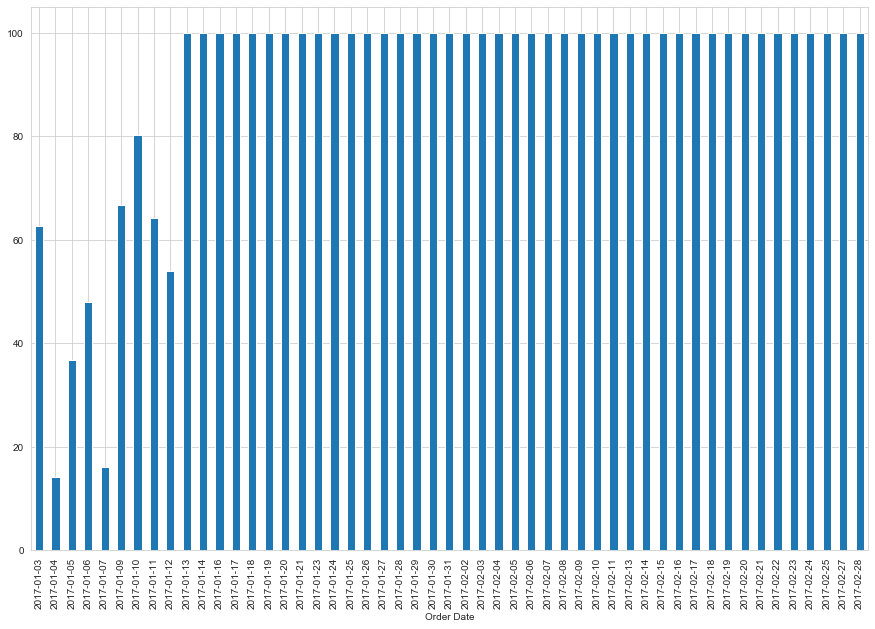

In [121]:
#Service by Date
percentageDate.plot(kind='bar')

# 3) ABC Classification

ABC classification or ABC analysis is used to help identify the most 

important products in their portfolio and ensure they focus on managing them above those less valuable. 

The ABC classification framework is based on the theory that all inventory is not of equal value. 

Instead it follows the Pareto Principle, where 20% of stock accounts for 80% of the value to the business. 

Using ABC classification you can therefore split inventory into three categories, A, B and C.

# Now we will create 3 classes A, B, and C based on given criteria

In [70]:
def ABC_segmentation(perc):
    if perc > 0 and perc < 0.80:
        return 'A'
    elif perc >= 0.8 and perc < 0.95:
        return 'B'
    elif perc >= 0.95:
        return 'C'

# a) Classes per Client (Address Number)

In [71]:
data_sub = sales[['Ship To Address No','Quantity Shipped']]

In [40]:
Groupby_qty = data_sub['Quantity Shipped'].groupby(sales['Ship To Address No'], sort = True).sum()
Groupby_qty.head()

Ship To Address No
1254612.0    1407.0
1254686.0    1510.0
1254687.0     356.0
1254688.0     358.0
1254689.0     206.0
Name: Quantity Shipped, dtype: float64

In [41]:
data_sub['Total'] = data_sub['Quantity Shipped'] 
data_sub = data_sub.sort_values(by=['Total'], ascending=False)
data_sub['RunCumCost'] = data_sub['Total'].cumsum()
data_sub['Grand'] = data_sub['Total'].sum()
data_sub['Perc'] =  data_sub['RunCumCost']/data_sub['Grand']
data_sub['Class'] = data_sub['Perc'].apply(ABC_segmentation)
data_sub.Class.value_counts()

C:\Users\msingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


B    15249
C     9162
A     3904
Name: Class, dtype: int64

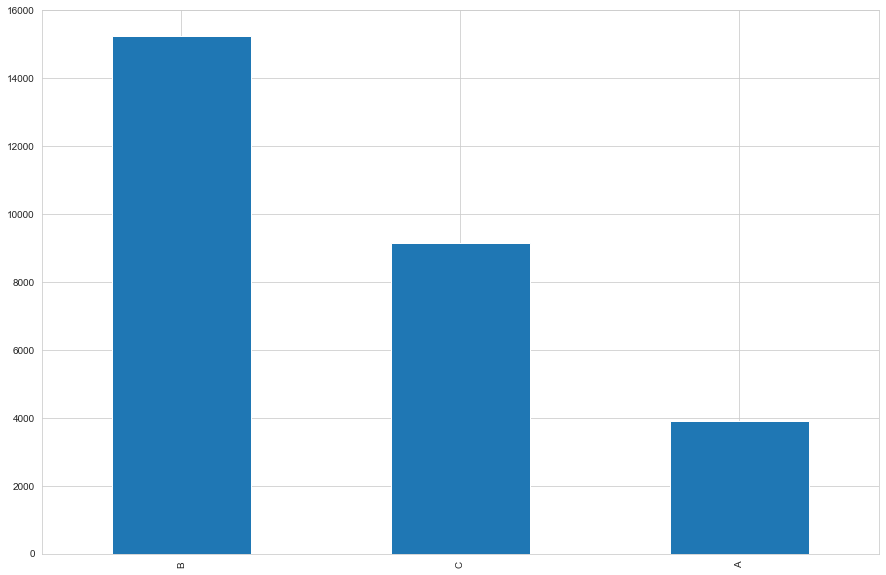

In [42]:
data_sub['Class'].index = data_sub['Ship To Address No'].index
data_sub['Class'].columns = ['value']
data_sub['Class'].value_counts().plot(kind='bar')

# This doesnt look right. I might ignore this.

Lets Try again

# a) ABC Class per client. Lets do it correct way this time.

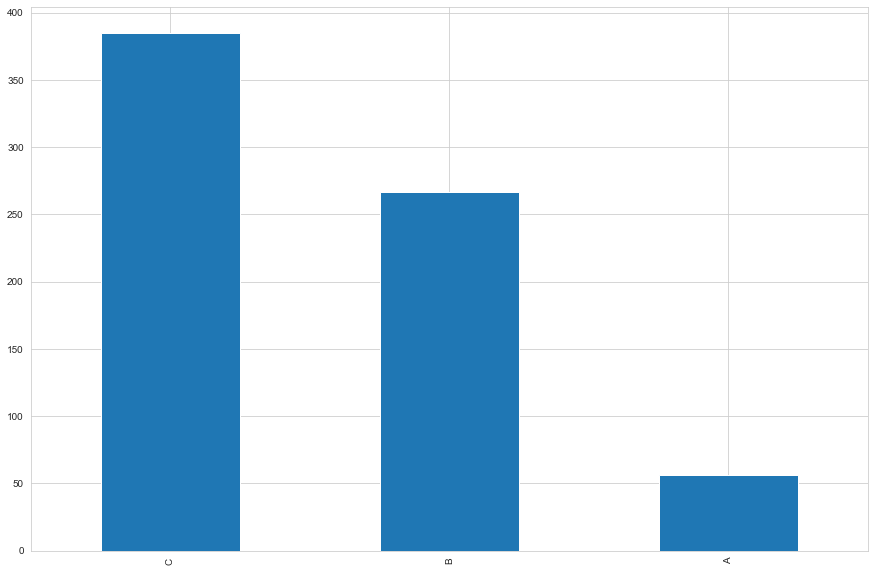

In [123]:
Groupby_qty = sales['Order Qty'].groupby(sales['Ship To Address No'], sort = True).sum()
sort = pd.DataFrame(Groupby_qty.sort_values(ascending  = False))
PercentageClient = sort.cumsum()/sort.sum()
cumsumavgClient =  [x[0] for x in PercentageClient.values.tolist()]
classifiedClient = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in PercentageClient.values.tolist()])
classifiedClient.index = PercentageClient.index
classifiedClient.columns = ['value']
classifiedClient['value'].value_counts().plot(kind='bar')

In [124]:
classifiedClient

,value
Ship To Address No,
1795849.0,A
1255123.0,A
1255548.0,A
1740542.0,A
1254798.0,A
...,...
1255451.0,C
1255454.0,C
1255269.0,C


This looks right. We had 708 Unique clients(addresses), which we successfully classified into three categories as per given criteria.  

# b) Classes by SKUs(Item Code)

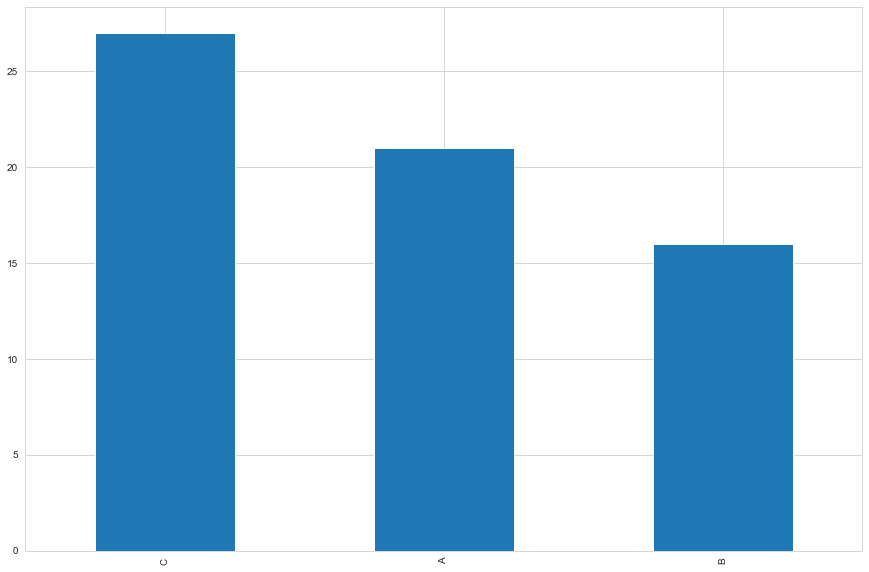

In [125]:
Groupby_qty = sales['Order Qty'].groupby(sales['Item Code'], sort = True).sum()
sort = pd.DataFrame(Groupby_qty.sort_values(ascending  = False))
PercentageSKU = sort.cumsum()/sort.sum()
cumsumavgSKU =  [x[0] for x in PercentageSKU.values.tolist()]
classifiedSKU = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in PercentageSKU.values.tolist()])
classifiedSKU.index = PercentageSKU.index
classifiedSKU.columns = ['value']
classifiedSKU['value'].value_counts().plot(kind='bar')

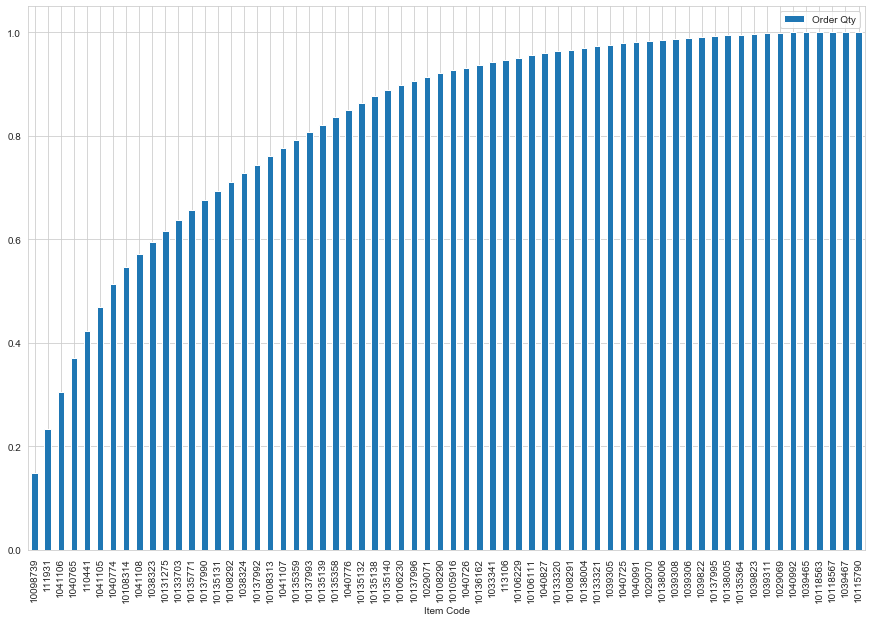

In [126]:
PercentageSKU.plot(kind='bar')

This is what I expected from a ABC classification.

In [127]:
classifiedSKU

,value
Item Code,
10098739,A
111931,A
1041106,A
1040765,A
110441,A
...,...
1039465,C
10118563,C
10118567,C


All the analysis we did in this report is quite useful in optimising the better performing SKUs and better clients. 
There were many SKUs and clients with many cancelled orders. We can necessary action.